Fix random seed for reproducibility


In [ ]:
import numpy as np
np.random.seed(123)

Import the Sequential model type from Keras

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

Load data from Fashion MNIST dataset


In [ ]:
from tensorflow.keras.datasets import fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

 **Returns**

 2 tuples:
 
    X_train, X_test: unit8 array of grayscale images with shape(num_samples,28,28)

    y_train, y_test: unit8 array of labels(integers in range 0-9) with shape (num_samples,)

Look at the shape of dataset

In [ ]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


**Preprocess the input data**

In [ ]:
print(X_train.shape[0])

60000


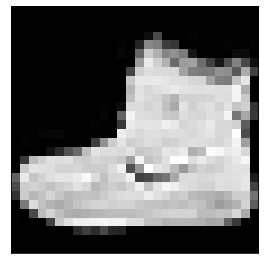

In [ ]:
#Display the original image from X_train set
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize =(20,10))

#display original image
ax = plt.subplot(2,1,1)
plt.imshow(X_train[0].reshape(28,28))
plt.gray()

ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

plt.show()

Print pixel value for above image

In [ ]:
image1_array = X_train[0].reshape(28,28)
np.set_printoptions(linewidth=150)
image1_array

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,   1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,   0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,   0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,   0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,  10,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 155, 236, 207, 178, 107, 156

Convert datatype to float32 and normalize data values to the range[0,1]

Max value X_train/X_test can take is 255, so divide with 255

In [ ]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255.
X_test /= 255.

**Preprocess class labels**

Look at the shape of class label data

In [ ]:
print(y_train.shape)

(60000,)


We should have 10 different classes, one for each image but it looks like we have a 1D array

In [ ]:
print(y_train[:10])

[9 0 0 3 0 2 7 2 5 5]


Build a simple MLP

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape =(28,28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])
model.compile(optimizer='adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=32, epochs=100, verbose=1)

Epoch 1/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5013 - accuracy: 0.8247
Epoch 2/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3733 - accuracy: 0.8652
Epoch 3/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3339 - accuracy: 0.8788
Epoch 4/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3124 - accuracy: 0.8861
Epoch 5/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2942 - accuracy: 0.8922
Epoch 6/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2784 - accuracy: 0.8963
Epoch 7/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2656 - accuracy: 0.9012
Epoch 8/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2568 - accuracy: 0.9048
Epoch 9/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2479 - accuracy: 0.9079
Epoch 10/100
1875/1875 [==============================] - 3s 2ms/step - l

In [ ]:
from tensorflow.keras import initializers
initializer = tf.keras.initializers.GlorotUniform()

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape =(28,28)),
    tf.keras.layers.Dense(128, activation='relu', kernel_initializer=initializer),
    tf.keras.layers.Dense(10)
])
model.compile(optimizer='adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=32, epochs=120, verbose=1)

Epoch 1/120
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5041 - accuracy: 0.8233
Epoch 2/120
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3760 - accuracy: 0.8653
Epoch 3/120
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3386 - accuracy: 0.8759
Epoch 4/120
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3148 - accuracy: 0.8849
Epoch 5/120
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2951 - accuracy: 0.8915
Epoch 6/120
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2808 - accuracy: 0.8960
Epoch 7/120
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2660 - accuracy: 0.9009
Epoch 8/120
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2567 - accuracy: 0.9052
Epoch 9/120
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2484 - accuracy: 0.9080
Epoch 10/120
1875/1875 [==============================] - 3s 2ms/step - l